<a href="https://colab.research.google.com/github/Cate28/Estadistica-I-y-II/blob/main/Estadistica_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este trabajo se realiza un análisis estadístico de la base de datos de nacimientos en Colombia en el año 2020, proporcionada por el Departamento Administrativo Nacional de Estadística (DANE). La base de datos, nac2020.csv contiene información detallada proveniente de los certificados de nacido vivo, lo cual permite explorar diversas variables relevantes para la comprensión de los patrones demográficos de salud en el país.

Este trabajo trata de responder tres preguntas acerca de los datos obtenidos por el DANE. Estas son las preguntas:
1. ¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?  
2. ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia
(TALLA_NAC)?  
3. ¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau
import scipy.stats as stats

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [ ]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df2 = tabla1[(tabla1.T_GES < 99) & (tabla1["TALLA_NAC"] != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
df2.T_GES.head(3)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(3)

<ipython-input-103-18323f29e018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
27    4
Name: T_GES, dtype: object

In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "menor a 22"
df2.loc[(df2.T_GES == "3"), "T_GES"], df2.loc[(df2.T_GES == "4"), 'T_GES'] = "28-37", "38-41"
df2.loc[(df2.T_GES == "5"), 'T_GES'], df2.loc[(df2.T_GES == "6"), 'T_GES'] = "42 y más", "Ignorado"
df2.loc[(df2.T_GES == "9"), 'T_GES'] = "Sin información"
df2.head(5)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5


In [ ]:
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5


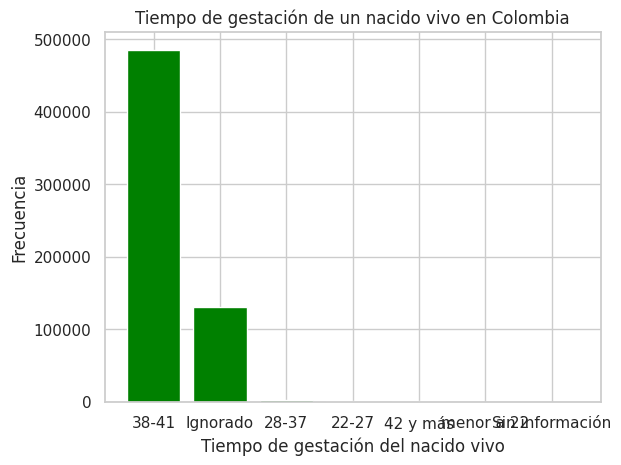

In [ ]:
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Tiempo de gestación de un nacido vivo en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación del nacido vivo')
ax.set_ylabel('Frecuencia')
plt.show()

En la gráfica anterior se puede observar la frecuencia de los datos correspondientes de tiempo de gestación del nacido vivo. Como se puede ver los datos que el rango de tiempo con mayor frecuencia es de 38-41, es decir, que ese rango viene siendo la moda de estos datos. Además, se puede percibir que en el rango "ignorado" tiene una alta frecuencia alrededor de 150000.

Por otra parte, se puede decir que los demás datos tienen una frecuencia menor de 100000 ya que no se mostraron en el histograma anterior. También, que en los datos obtenidos por el DANE de los nacimientos en Colombia se presenta que el tiempo de gestación de un nacido vivo está entre 38-41 días mas o menos.


In [ ]:
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1482,   1163,     28,     14])

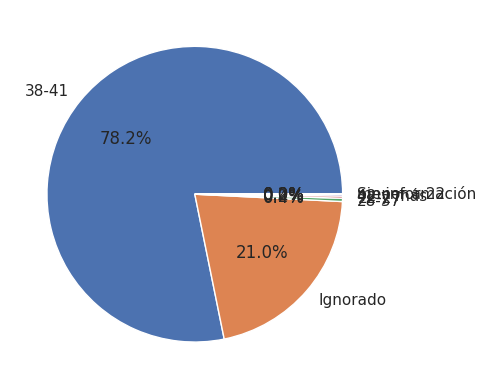

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.T_GES)

620841

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' 'Ignorado' '28-37' '22-27' '42 y más' 'menor a 22'
 'Sin información']
[78.18958477291287, 21.017458576350467, 0.3601566262537429, 0.2387084615867831, 0.18732654576614624, 0.004510011419993203, 0.0022550057099966015]


En el anterior diagrama se puede observar el porcentaje correspondiente a cada valor del tiempo de gestación del nacido vivo en Colombia. Se puede percibir que el tiempo de gestación de un nacido vivo entre 31-41 dias presenta un porcentaje de 78.2%. Además, el tiempo de gestación de un nacido vivo entre el rango "ignorado" presenta un porcentaje del 21.01% y el resto de tiempos presentan un bajo porcentaje, por ejemplo, el tiempo de gestacion de un nacido de menor días tiene un porcentaje del 0.22%.

Respondiendo la pregunta ¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?, se puede observar que la gráfica presenta una distribución con asimetría hacia la derecha, ya que, los datos obtenidos se acumulan en la parte derecha del histograma.

# ✈ Talla de nacimiento a partir de aquí:::::::::::::::::::::::::::::::::::::::::::::

In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-115-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


COD_DPTO
52    4
20    5
Name: TALLA_NAC, dtype: object

In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "4"), 'TALLA_NAC'] = "menos de 20", "20-29", "30-39", "40-49"
df2.loc[(df2.TALLA_NAC == "5"), 'TALLA_NAC'], df2.loc[(df2.TALLA_NAC == "6"), 'TALLA_NAC'] = "50-59", "60 y Más"
df2.loc[(df2.TALLA_NAC == "9"), 'TALLA_NAC'] = "Sin información"
df2.head(5)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59
27,38-41,40-49
27,38-41,50-59


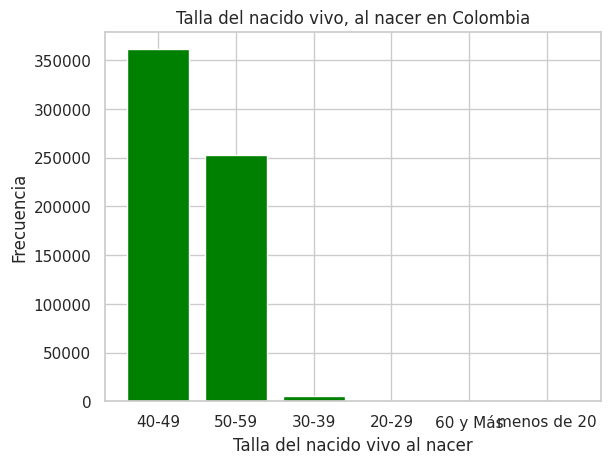

In [ ]:
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title('Talla del nacido vivo, al nacer en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla del nacido vivo al nacer')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
sizes = np.array(y_values)
sizes

array([361456, 253074,   5716,    478,    115,      2])

En el anterior histograma se muestra la frecuencia de los datos correspondientes de la talla del nacido vivo al nacer en Colombia. Se puede observar que la talla del nacido vivo entre 40-49 cm tiene una frecuencia de mas de 350000 y la talla del nacido entre 30-39 tiene una frecuencia menor de 50000. Además, se puede ver que la media de los datos de la talla del nacido se encuentra entre 50-59 cm y las demás tallas que están en el histograma presentan una menor frecuencia con respecto a la talla 30-39 cm.

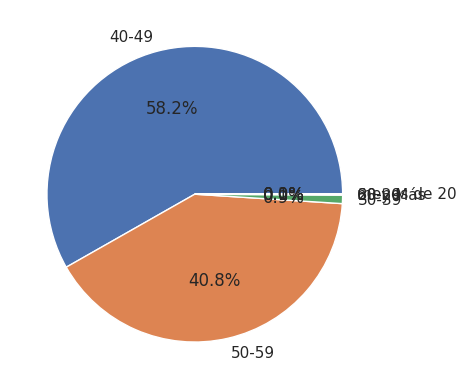

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.T_GES)

620841

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['40-49' '50-59' '30-39' '20-29' '60 y Más' 'menos de 20']
[58.22038170803797, 40.76309393226285, 0.9206866170243266, 0.0769923378127411, 0.018523261189257796, 0.0003221436728566574]


La anterior gráfica presenta el orcentaje correspondiente a cada valor de la talla del nacido vivo al nacer.Tanto en ela gráfica como en el código se puede ver que la talla de un recién nacido en Colombia presenta un porcentaje del 58.22% es decir, que la talla del recién nacido entre 40-49 cm sería la moda de estos datos. Además, la talla de un recién nacido entre 50-59 presenta un porcentaje del 40.76% y la talla entre 30-39 tiene un porcentaje del 0.92%.

Por otra parte, respondiendo la pregunta ¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC)? se puede mirar que la gráfica presenta una distribución con asimetría hacia la derecha, ya que, los datos obtenidos se acumulan en la parte derecha del histograma.




# **Tabla de contingencia**

In [ ]:

df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-128-2afbdb5560f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,40-49
20,38-41,50-59
27,38-41,50-59


In [ ]:
tabla_cont = pd.crosstab(df2.TALLA_NAC, df2["T_GES"])
tabla_cont

T_GES,22-27,28-37,38-41,42 y más,Ignorado,Sin información,menor a 22
TALLA_NAC,,,,,,,
20-29,260,53,76,0,67,0,22
30-39,1872,3619,198,0,21,0,6
40-49,102,89212,162543,256,959,2,0
50-59,0,37593,322515,902,434,12,0
60 y Más,0,8,101,5,1,0,0
menos de 20,2,0,0,0,0,0,0


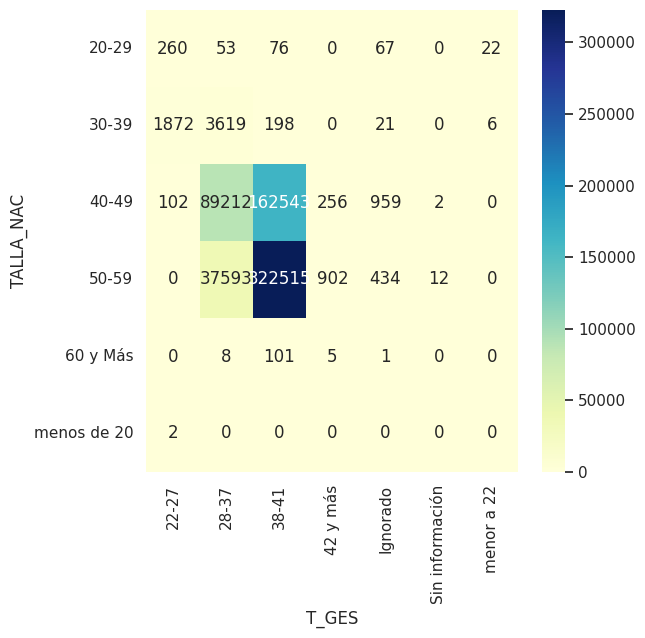

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 299857.06145882915 y el valor p es d 0.0


El valor de la estadística Chi cuadrado es 299857.06145882915 y el valor p es d 0.0

Como p es d 0.0 se dice que se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95%.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5706877179272872, 0.6949714206726477 y 0.6949714206726477


En el código anterior se puede ver que los coeficientes de contigencia encontrados en las dos variables presentan una pequeña igualdad, es decir, que las variables de T_GES y TALLA_NAC tienen una pequeña relación entre ellas.

In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.T_GES))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.T_GES)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")

Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5706877179272872, 0.6949714206726477 y 0.6949714206726477


En conclusión, respondiendo las preguntas ¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una variable de la otra o qué tan asociadas están ambas?, se puede decir que las variables T_GES y TALA_NAC están asociadas entre ella ya que al observar la tabla se ve que entre ellas dos se presenta una asociación.  